In [1]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the training dataset in a dataframe using Pandas
dftrain = pd.read_csv("/content/sample_data/train.csv")

# Reading the test dataset in a dataframe using Pandas
dftest = pd.read_csv("/content/sample_data/test.csv")

In [3]:
# First 10 Rows of training Dataset
dftrain.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Store total number of observation in training dataset
train_length =len(dftrain)

# Store total number of columns in testing data set
test_length = len(dftest.columns)

In [5]:
# Summary of numerical variables for training data set
dftrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Get the unique values and their frequency of variable Property_Area
dftrain['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
# Get the unique values and their frequency of variable Loan_Status
dftrain['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# Get the unique values and their frequency of variable Dependents
dftrain['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<Axes: >

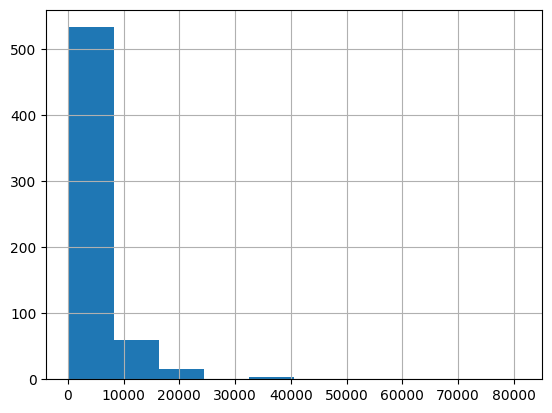

In [9]:
# Visualization for understanding the distributions and to observe the outliers.
%matplotlib inline

# Histogram of variable ApplicantIncome
dftrain['ApplicantIncome'].hist()

<Axes: >

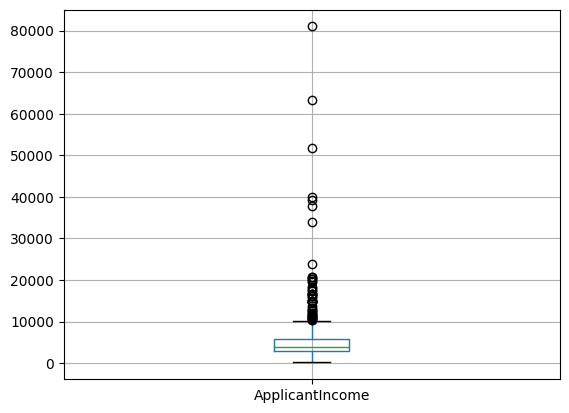

In [10]:
# Box Plot for variable ApplicantIncome of training data set
dftrain.boxplot(column='ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

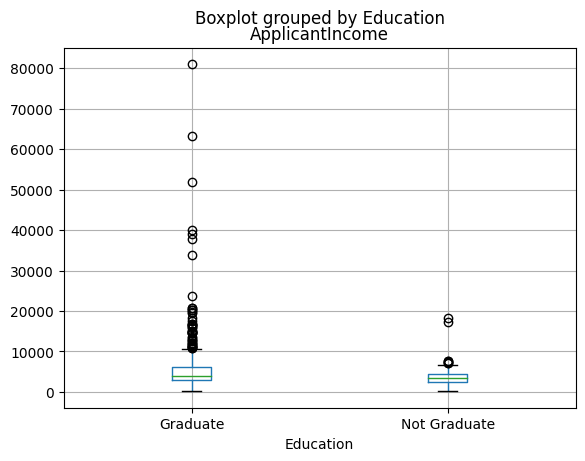

In [11]:
# Box Plot for variable ApplicantIncome by variable Education of training data set
dftrain.boxplot(column='ApplicantIncome', by = 'Education')

<Axes: >

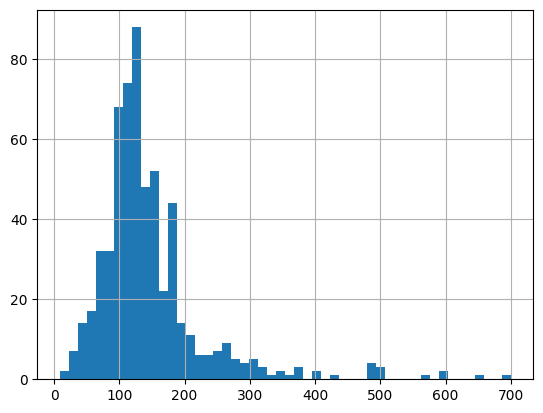

In [12]:
# Histogram of variable LoanAmount
dftrain['LoanAmount'].hist(bins=50)

<Axes: >

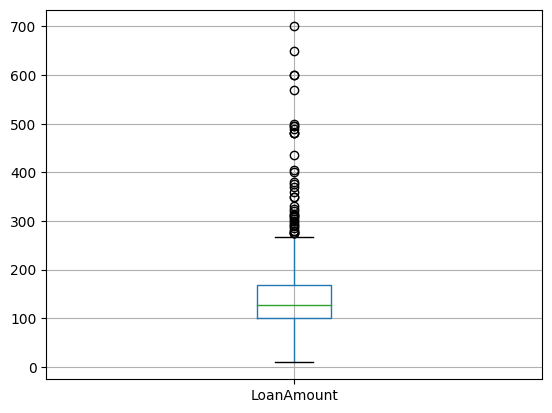

In [13]:
# Box Plot for variable LoanAmount of training data set
dftrain.boxplot(column='LoanAmount')

<Axes: title={'center': 'LoanAmount'}, xlabel='Gender'>

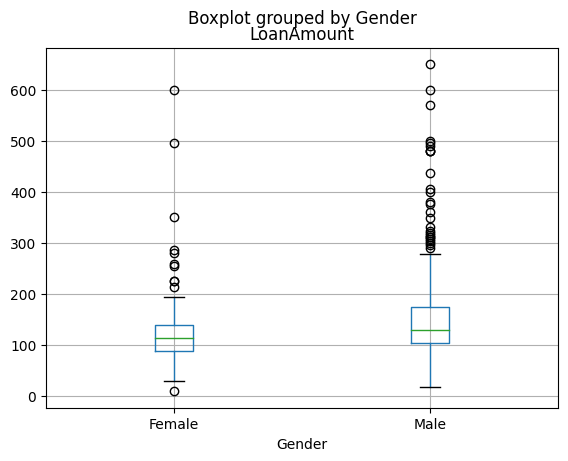

In [14]:
# Box Plot for variable LoanAmount by variable Gender of training data set
dftrain.boxplot(column='LoanAmount', by = 'Gender')

In [15]:
# Loan approval rates in absolute numbers
loan_approval = dftrain['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [16]:
# Credit History and Loan Status
pd.crosstab(dftrain['Credit_History'], dftrain['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [17]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# # Loan approval rate for customers having Credit_History (1)
# dftrain['Y'] = pd.crosstab(dftrain["Credit_History"], dftrain ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
# loan_approval_with_Credit_1 = dftrain['Y'][1]
# print(loan_approval_with_Credit_1*100)

In [18]:
pd.crosstab(dftrain["Credit_History"], dftrain ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


1.   68.26% of loans were approved.
2.   79.57% of approved loans had a credit history
3.   92.12% of unapproved loans had no credit history.



In [19]:
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

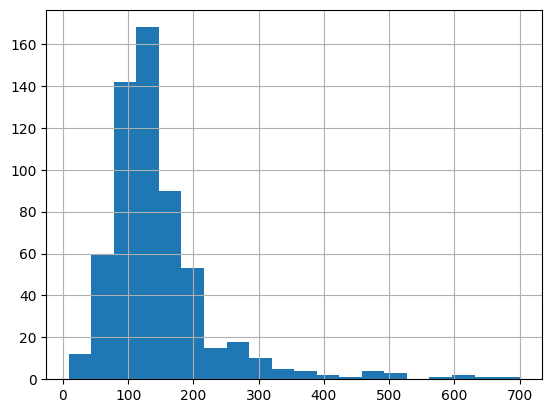

In [20]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
dftrain['TotalIncome'] = dftrain['ApplicantIncome'] + dftrain['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
dftrain['LoanAmount'].hist(bins=20)

<Axes: >

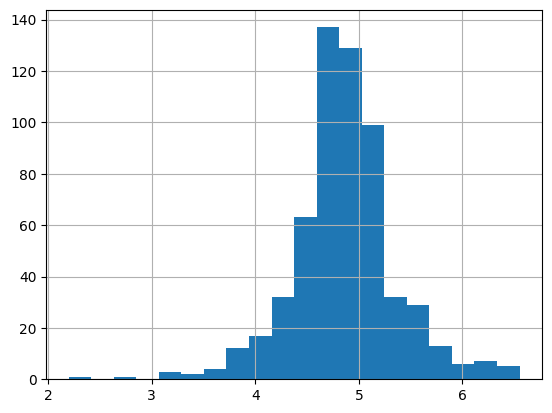

In [21]:
# Perform log transformation of TotalIncome to make it closer to normal
dftrain['LoanAmount_log'] = np.log(dftrain['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
dftrain['LoanAmount_log'].hist(bins=20)

In [22]:
dftrain.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanAmount_log       22
dtype: int64

In [23]:
# Impute missing values for Gender
dftrain['Gender'].fillna(dftrain['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
dftrain['Married'].fillna(dftrain['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
dftrain['Dependents'].fillna(dftrain['Dependents'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
dftrain['Self_Employed'].fillna(dftrain['Self_Employed'].mode()[0],inplace=True)

# Impute missing values for Credit_History
dftrain['Credit_History'].fillna(dftrain['Credit_History'].mode()[0],inplace=True)

In [24]:
dftrain.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanAmount_log       22
dtype: int64

In [25]:
# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    dftrain[var]=le.fit_transform(dftrain[var].astype('str'))
dftrain.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [26]:
dftrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,Y,5849.0,NaN
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,N,6091.0,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,Y,3000.0,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,Y,4941.0,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,Y,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,Y,2900.0,4.262680
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,Y,4106.0,3.688879
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,Y,8312.0,5.533389
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,Y,7583.0,5.231109


#BUILDING MODEL

In [27]:
#Combining both train and test dataset
#Create a flag for Train and Test Data set

dftrain['Type']='Train'
dftest['Type']='Test'
fullData = pd.concat([dftrain,dftest], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        29
Property_Area          0
Loan_Status          367
TotalIncome          367
LoanAmount_log       389
Type                   0
dtype: int64

In [28]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [29]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

In [30]:
#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

<Axes: >

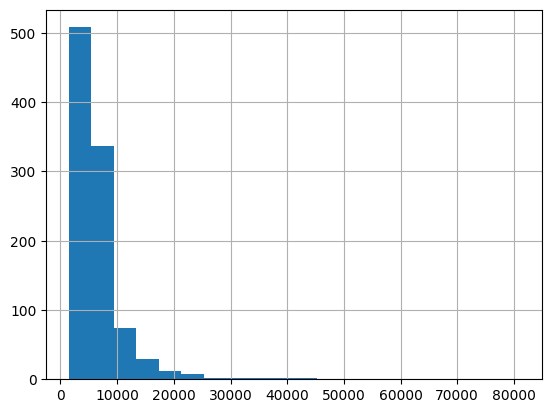

In [31]:
#Create a new column as Total Income
fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

#Histogram for Total Income
fullData['TotalIncome'].hist(bins=20)

<Axes: >

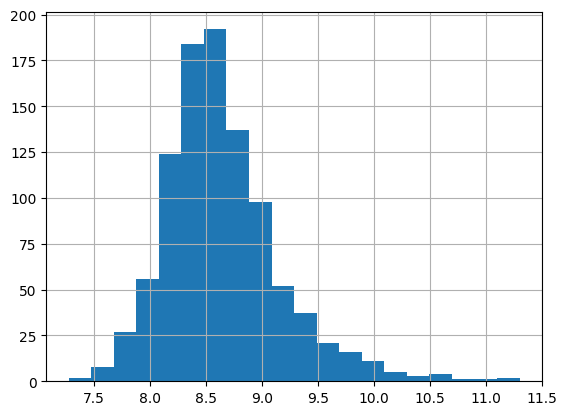

In [32]:
fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [33]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

In [34]:
train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']

In [35]:
train_modified["Loan_Status"].dtype

dtype('O')

In [36]:
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

<ipython-input-36-862f0ac5c8e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))


In [37]:
train_modified["Loan_Status"].dtype

dtype('int64')

In [38]:
train_modified.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.2724,342.004603,0.855049,1.037459,0.687296,7024.705081,4.857444,8.669414
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.0406,64.372496,0.352339,0.787482,0.463973,6458.663872,0.495995,0.545102
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.0000,12.000000,0.000000,0.000000,0.000000,1442.000000,2.197225,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.2500,360.000000,1.000000,0.000000,0.000000,4166.000000,4.607658,8.334712
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.0000,360.000000,1.000000,1.000000,1.000000,5416.500000,4.857444,8.597205
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.7500,360.000000,1.000000,2.000000,1.000000,7521.750000,5.104426,8.925549
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.0000,480.000000,1.000000,2.000000,1.000000,81000.000000,6.551080,11.302204


<ipython-input-39-c3f4b8132a4b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_modified.corr(), annot=True, cmap='coolwarm', center=0)


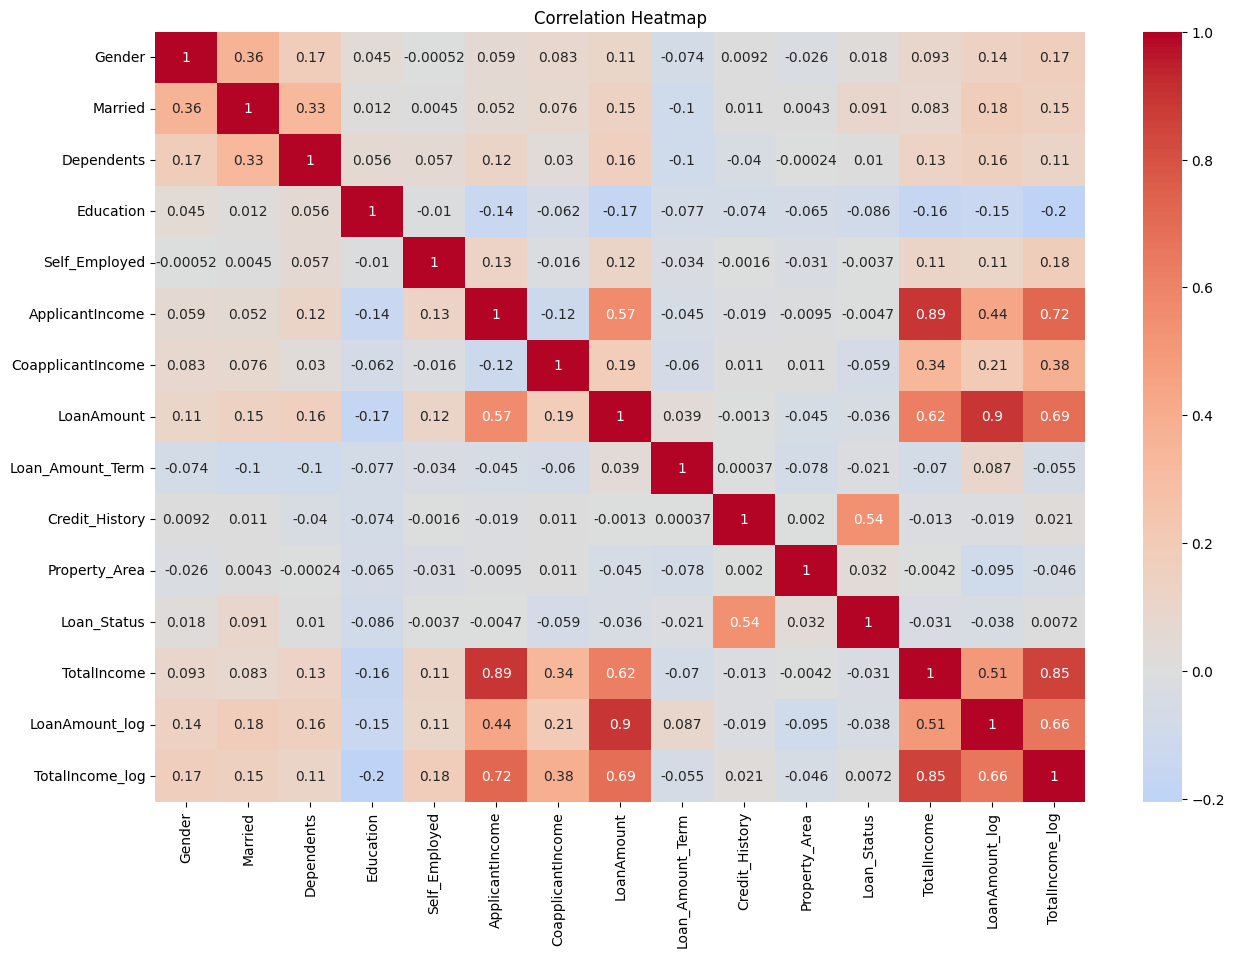

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(train_modified.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. The chances of getting a loan will be higher for:

    - Applicants having a credit history (we observed this in exploration.)
    - Applicants with higher applicant and co-applicant incomes
    - Applicants with higher education level
    - Properties in urban areas with high growth perspectives

So let’s make our model with ‘Credit_History’, 'Income', 'Education' & 'Area'

In [50]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

predictors_Logistic=['Credit_History', 'Education', 'CoapplicantIncome', 'Married']
x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

# Instantiate
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brfc.fit(x_train, y_train)
predictions = brfc.predict(x_train)
accuracy = metrics.accuracy_score(predictions,y_train)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 81.433%


In [43]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold


#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    scores = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        scores.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(scores)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [47]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

predictors_Logistic=['Credit_History', 'Education', 'CoapplicantIncome', 'Married']
outcome_var = ['Loan_Status']

lr = LogisticRegression()
classification_model(lr, dftrain , predictors_Logistic, outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 80.784%


In [48]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

predictors=['Credit_History', 'Education', 'CoapplicantIncome', 'Married']
outcome_var = ['Loan_Status']

# Instantiate
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
classification_model(brfc, dftrain , predictors, outcome_var)

Accuracy : 81.433%
Cross-Validation Score : 70.031%


In [ ]:
x_test=test_modified[list(predictors_Logistic)].values

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

In [ ]:
test_modified['Loan_Status'].value_counts()